## Transmission Competition

### Imports

In [23]:
from typing import Optional
import numpy as np
import os
import matplotlib.pyplot as plt
from transmission_competition.HuffmanCoder import HuffmanCoder
from transmission_competition.LempelZivCoder import LempelZivCoder
from transmission_competition.HammingCoder74 import HammingCoder74
from transmission_competition.EntropyCalculator import EntropyCalculator
from transmission_competition.PSKModulator import PSKModulator
from transmission_competition.CSSModulator import CSSModulator 
from TransmissionModule import TransmissionModule

### Input Definition
Here we can change our input string.


In [24]:
file_path = "input_text_short.txt"
file_handle = open(file_path, "r")
input_text = file_handle.read()
file_handle.close()

print(input_text)

Hello, world!


### Soruce Coding
We implemented Huffman and Lempel Ziv source coding.
Both of them have a encode and a decode method. We convert from a string to an np.ndarray and vice versa.

In [25]:
huffman_coder = HuffmanCoder()
lempel_ziv_coder = LempelZivCoder()

# Huffman Coding
huffman_encoded = huffman_coder.encode(input_text)
huffman_decoded = huffman_coder.decode(huffman_encoded)

print("***** HUFFMAN CODING **********************************************")
print(f"Original Text: {input_text!r}")
print(f"Encoded (Huffman): {huffman_encoded}")
print(f"Decoded (Huffman): {huffman_decoded!r}")
print("Is Decoded Equal to Original?:", huffman_decoded == input_text)
print("*******************************************************************\n")

# Lempel-Ziv Coding
lempelziv_encoded = lempel_ziv_coder.encode(input_text)
lempelziv_decoded = lempel_ziv_coder.decode(lempelziv_encoded)

print("***** LEMPEL-ZIV CODING *******************************************")
print(f"Original Text: {input_text!r}")
print(f"Encoded (Lempel-Ziv): {lempelziv_encoded}")
print(f"Decoded (Lempel-Ziv): {lempelziv_decoded!r}")
print("Is Decoded Equal to Original?:", lempelziv_decoded == input_text)
print("*******************************************************************")


***** HUFFMAN CODING **********************************************
Original Text: 'Hello, world!'
Encoded (Huffman): [0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0]
Decoded (Huffman): 'Hello, world!'
Is Decoded Equal to Original?: True
*******************************************************************

***** LEMPEL-ZIV CODING *******************************************
Original Text: 'Hello, world!'
Encoded (Lempel-Ziv): [0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1

### Channel Coding
We implemented (7,4) Hamming channel coding.
The input as well as the output is obviously a np.ndarray. The channel coded message is expected to be 7/4 times larger than the source coded version.

In [26]:
hamming_coder_74 = HammingCoder74()

test_sequence = np.array([0, 1, 0, 0, 1, 0, 1, 1])

# Hamming Coding
hamming_encoded = hamming_coder_74.encode(test_sequence)

# Simulate channel errors
per_bit_error_rate = 0.05  # Example error rate; adjust as needed
transmitted, error_desc = hamming_coder_74.channel_simulator(hamming_encoded, per_bit_error_rate)

# Decode the transmitted (possibly erroneous) code
hamming_decoded = hamming_coder_74.decode(transmitted)

print("***** HAMMING CODING **********************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Encoded (Hamming): {hamming_encoded}")
print(f"Transmitted (after channel simulation): {transmitted}")
print(f"Error Description: {error_desc}")
print(f"Decoded (Hamming): {hamming_decoded}")
print("Is Decoded Equal to Original?:", np.array_equal(hamming_decoded, test_sequence))
print("*******************************************************************\n")


***** HAMMING CODING **********************************************
Original Sequence: [0 1 0 0 1 0 1 1]
Encoded (Hamming): [1 0 0 1 1 0 0 0 1 1 0 0 1 1]
Transmitted (after channel simulation): [1 0 0 1 1 0 0 0 1 1 0 0 1 1]
Error Description: No error introduced
Decoded (Hamming): [0 1 0 0 1 0 1 1]
Is Decoded Equal to Original?: True
*******************************************************************



### Modulation

We have implemented three types of modulation:

- PSK
- QPSK
- Chirp Modulation

All of them take a numpy array (`np.ndarray`) as input and output a numpy array with float values representing the signal.

In [30]:
psk_modulator = PSKModulator()
css_modulator = CSSModulator()
# qpsl_modulator = QPSKModulator() WILL BE ADDED LATER

# PSK (QPSK) requires EVEN number of bits (2 bits per symbol)
# CSS can handle any number of bits (1 bit per symbol)
test_sequence = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

# Noise parameters
SNR_DB = 10.0  # Signal-to-Noise Ratio in dB

# PSK Modulation
psk_modulated = psk_modulator.PSK_modulate(test_sequence)
psk_noisy = psk_modulator.add_awgn_noise(psk_modulated, SNR_DB)
psk_demodulated = psk_modulator.PSK_demodulate(psk_noisy)

print("***** PSK MODULATION **********************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Modulated Signal Shape: {psk_modulated.shape}")
print(f"SNR: {SNR_DB} dB")
print(f"Modulated Signal (first 20 samples): {psk_modulated[:20]}")
print(f"Noisy Signal (first 20 samples): {psk_noisy[:20]}")
print(f"Demodulated Sequence: {psk_demodulated}")
print("Is Demodulated Equal to Original?:", np.array_equal(psk_demodulated, test_sequence))
print("*******************************************************************\n")

# CSS (Chirp Spread Spectrum) Modulation
css_modulated = css_modulator.CSS_modulate(test_sequence)
css_noisy = css_modulator.add_awgn_noise(css_modulated, SNR_DB)
css_demodulated = css_modulator.CSS_demodulate(css_noisy)

print("***** CSS (CHIRP) MODULATION **************************************")
print(f"Original Sequence: {test_sequence}")
print(f"Modulated Signal Shape: {css_modulated.shape}")
print(f"SNR: {SNR_DB} dB")
print(f"Modulated Signal (first 20 samples): {css_modulated[:20]}")
print(f"Noisy Signal (first 20 samples): {css_noisy[:20]}")
print(f"Demodulated Sequence: {css_demodulated}")
print("Is Demodulated Equal to Original?:", np.array_equal(css_demodulated, test_sequence))
print("*******************************************************************\n")


***** PSK MODULATION **********************************************
Original Sequence: [0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 0 1]
Modulated Signal Shape: (2100,)
SNR: 10.0 dB
Modulated Signal (first 20 samples): [ 0.70710678  0.98768834  0.89100652  0.4539905  -0.15643447 -0.70710678
 -0.98768834 -0.89100652 -0.4539905   0.15643447  0.70710678  0.98768834
  0.89100652  0.4539905  -0.15643447 -0.70710678 -0.98768834 -0.89100652
 -0.4539905   0.15643447]
Noisy Signal (first 20 samples): [ 1.0422663   0.71240021  0.61058002 -0.07079043 -0.01528641 -1.14269331
 -1.14293107 -1.13388621 -0.69256291 -0.08425156  0.79707964  1.10827838
  0.90954253  0.41379709 -0.3218259  -0.35851116 -0.77811682 -1.09467674
 -0.57111638  0.340809  ]
Demodulated Sequence: [0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 0 1]
Is Demodulated Equal to Original?: True
*******************************************************************

***

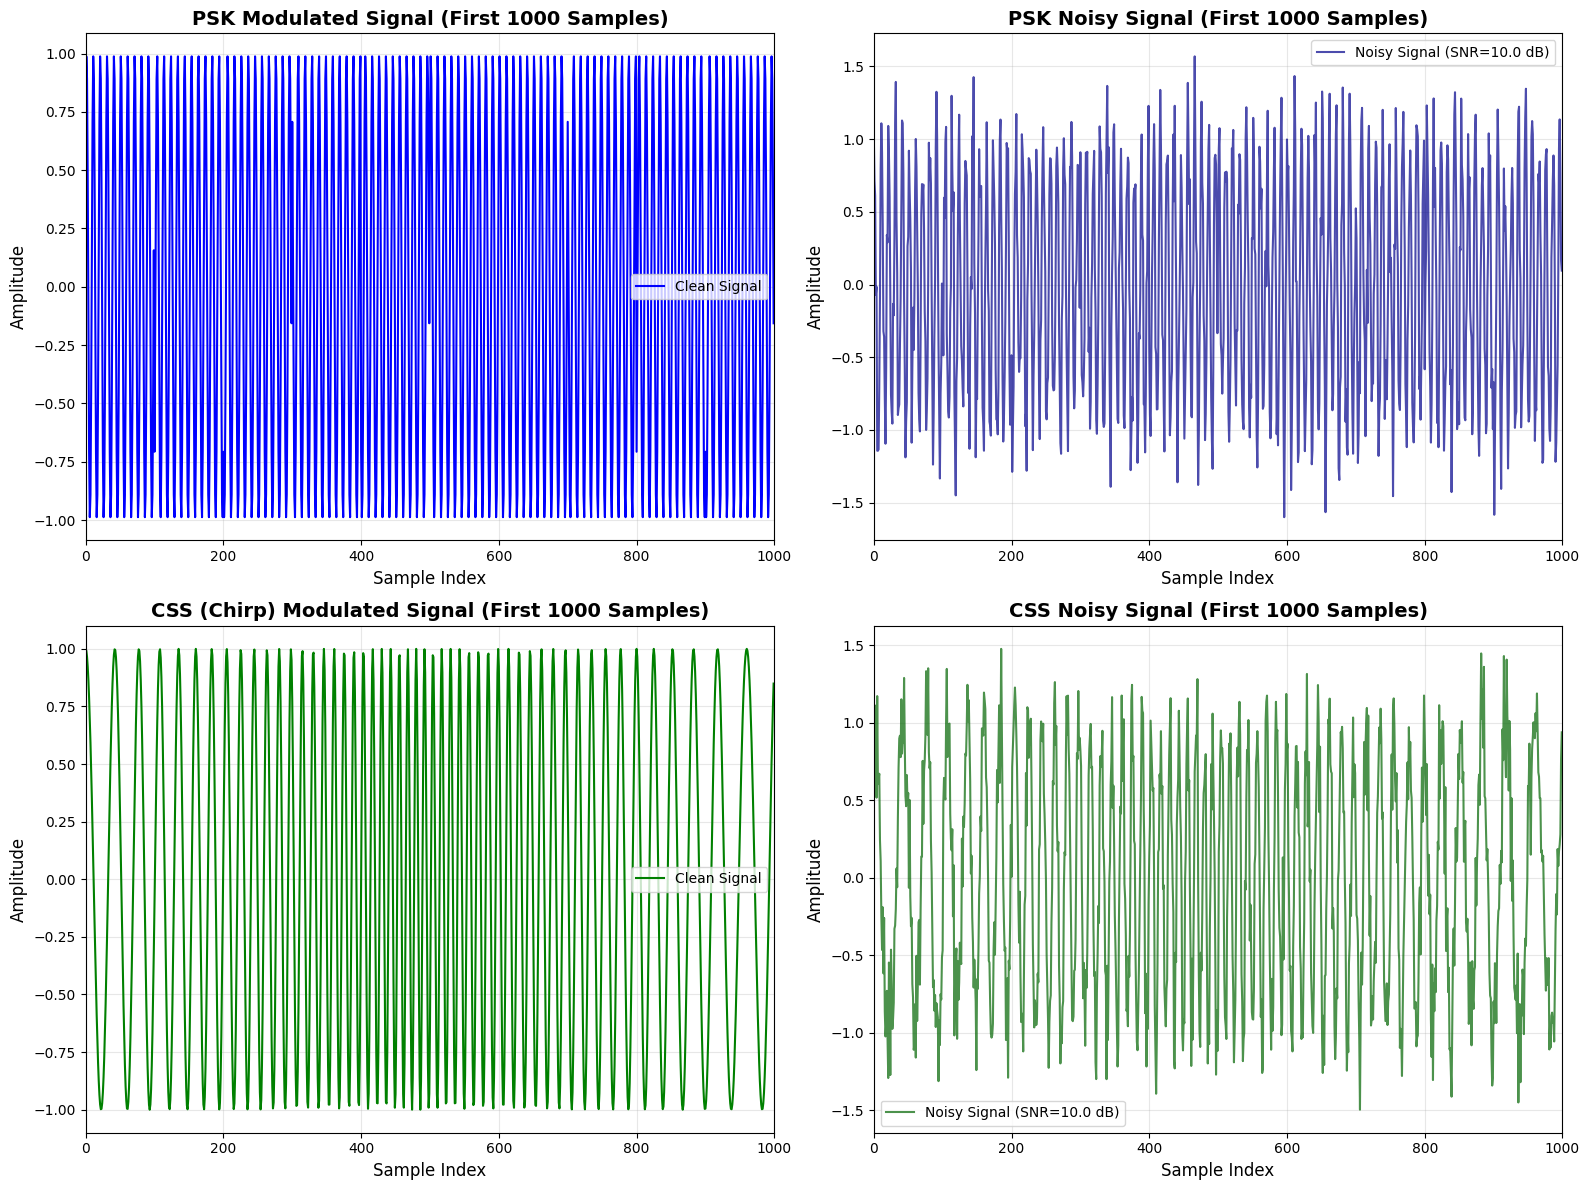

In [35]:
# Visualization of Modulated Signals
N = 1000  # Number of first samples to plot

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot PSK Modulated Signal (first N samples)
axes[0, 0].plot(psk_modulated[:N], linewidth=1.5, color='blue', label='Clean Signal')
axes[0, 0].set_title('PSK Modulated Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sample Index', fontsize=12)
axes[0, 0].set_ylabel('Amplitude', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(0, N)
axes[0, 0].legend()

# Plot PSK Noisy Signal
axes[0, 1].plot(psk_noisy[:N], linewidth=1.5, color='darkblue', alpha=0.7, label=f'Noisy Signal (SNR={SNR_DB} dB)')
axes[0, 1].set_title('PSK Noisy Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sample Index', fontsize=12)
axes[0, 1].set_ylabel('Amplitude', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlim(0, N)
axes[0, 1].legend()

# Plot CSS Modulated Signal (first N samples)
axes[1, 0].plot(css_modulated[:N], linewidth=1.5, color='green', label='Clean Signal')
axes[1, 0].set_title('CSS (Chirp) Modulated Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sample Index', fontsize=12)
axes[1, 0].set_ylabel('Amplitude', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, N)
axes[1, 0].legend()

# Plot CSS Noisy Signal
axes[1, 1].plot(css_noisy[:N], linewidth=1.5, color='darkgreen', alpha=0.7, label=f'Noisy Signal (SNR={SNR_DB} dB)')
axes[1, 1].set_title('CSS Noisy Signal (First {} Samples)'.format(N), fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sample Index', fontsize=12)
axes[1, 1].set_ylabel('Amplitude', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xlim(0, N)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


### Synchronisation

To ensure the receiver knows where the signal starts and ends, we need to pad it with a known pattern before and after the actual signal.
The receiver then can extract the actual signal by removing the known pattern.  

In [ ]:
## Implement Padding and Depadding

